# Introduction to Machine Learning: Tutorial 2

This tutorial is an aggregation of four notebooks from the course repository @ https://github.com/yueliyl/gec_intro2ml/. Each notebook covers a specific topic, namely:


*   [Linear Regression](https://github.com/yueliyl/gec_intro2ml/blob/master/LinearRegression.ipynb)
*   [Logistic Regression](https://github.com/yueliyl/gec_intro2ml/blob/master/LogisticRegression.ipynb)
*   [Multiclass Regression](https://github.com/yueliyl/gec_intro2ml/blob/master/MulticlassLogistic.ipynb)
*   [Regularization](https://github.com/yueliyl/gec_intro2ml/blob/master/Regularization.ipynb)

Feel free to consult these notebooks for additional material.



In [ ]:
import numpy as np
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')

#set seed for reproducibility as it initializes the random number generator
np.random.seed(42)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/yueliyl/comp551-notebooks/blob/master/LinearRegression.ipynb)


# Linear Regression
Lets define a linear regression class, with the usual fit and predict methods.

In [ ]:
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])    #add bias by adding a constant feature of value 1

        #alternatively: self.w = np.linalg.inv(x.T @ x)@x.T@y
        self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference
        return self

    def predict(self, x):
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
            yh = x@self.w                             #predict the y values
        else: #DMK
            yh = x[:,None] @ model.w[:,None]
        return yh


fit this linear model to toy data with $x \in \Re^1$ + a bias parameter

In [ ]:
## create directory (DMK)
import os
os.mkdir('figures')
os.mkdir('figures/LinearRegression')

In [ ]:
## Number of samples
N = 20

## Generate data
# x = np.random.rand(N) * 10            #generate N random numbers from 0-10

x = np.random.randint(0,3, N)           #generate N random numbers from 0-10
y = 3 + -3*x + 1*np.random.randn(N)    #generate y using a linear model and add some noise

## Fit Linear Regression model
model = LinearRegression(add_bias=True)
yh = model.fit(x,y).predict(x)

## Plot and save data and LR model fit
plt.plot(x, y, '.')
plt.plot(x, yh, 'g-', alpha=.5)
plt.xlabel('x')
plt.ylabel(r'$y=w0 + w_1x$')
# plt.show()
plt.savefig('figures/LinearRegression/lr_1d.png', bbox_inches="tight", dpi=300)

## Print model parameters: slope (w1) and bias (w0)
print(model.w)

## Weight Space
Next, for the same problem we plot *cost* as a function of model parameters (weights), and show the correspondence between the different weights that lead to different costs and models fits.

The `plot_contour` is a helper function we use for plotting the cost function moving forward. This gives a contour plot of `f` as a functions of two parameters.

In [ ]:
import itertools
def plot_contour(f, x1bound, x2bound, resolution, ax):
    #function to plot the contours where f is the cost function
    x1range = np.linspace(x1bound[0], x1bound[1], resolution)
    x2range = np.linspace(x2bound[0], x2bound[1], resolution)

    xg, yg = np.meshgrid(x1range, x2range)
    zg = np.zeros_like(xg)

    for i,j in itertools.product(range(resolution), range(resolution)):
        zg[i,j] = f([xg[i,j], yg[i,j]])
    ax.contour(xg, yg, zg, 100)
    return ax

Now let's define the cost function for the linear regression example above, and visualize the cost and the fit of various models in terms of parameter values.

In [ ]:
## Set-up contour plot
cost = lambda w: .5*np.mean((w[0] + w[1]*x - y)**2)         #function to compute the cost
model_list = [(1,0), (0,-2), (3,-3), (4,-4), (15,3)]              #different weights of the model you want to consider

fig, axes = plt.subplots(ncols=2, nrows=1, constrained_layout=True, figsize=(10, 5))
plot_contour(cost, [-20,20], [-5,5], 50, axes[0])
colors = ['r','g', 'b', 'k','y']

## Plots
for i, w in enumerate(model_list):
    axes[0].plot(w[0], w[1], 'x'+colors[i], markersize=10, markeredgewidth=3)                 #plot the contours
    axes[1].plot(x, y, '.')                                 #plot the points
    axes[1].plot(x, w[0]+w[1]*x, '-'+colors[i], alpha=.5)   #plot the lines

axes[0].set_xlabel(r'$w_0$ - intercept')
axes[0].set_ylabel(r'$w_1$ - slope')
axes[0].set_title('weight space')

axes[1].set_xlabel('x')
axes[1].set_ylabel(r'$y=xw_1 + w_0$')
axes[1].set_title('data space')
plt.show()

#plt.savefig('figures/LinearRegression/contour.png', bbox_inches="tight", dpi=300)

Note that brighter colors (e.g. yellow) for the contour lines are associated with higher cost in the contour plot, and vice-versa for cold colors (e.g. purple). In the plot above you see that the blue fit is better that others; it also has the lowest cost.

## Nonlinear basis functions
Consider the toy dataset below. It is obvious that our attempt to model $y$ as a linear function of $x$ would produce a bad fit.
Let's try!

In [ ]:
## Number of samples
N = 100

## Generate samples
x = np.linspace(0,10, N)
yt = np.sin(x) + np.cos(x**.5)                      #nonlinear!
y = yt + .5*np.random.randn(N)                      #generate y using a non linear model and add noise
yh = model.fit(x,y).predict(x)

## Plot and save
plt.plot(x, y, '.')
plt.plot(x, yt, 'b-', label='correct model')
plt.plot(x, yh, 'g-', alpha=.5, label='linear fit')
plt.xlabel('x')
plt.ylabel(r'y')
plt.legend()
plt.show()

#plt.savefig('figures/LinearRegression/sin.png', bbox_inches="tight", dpi=300)

One way around this issue is to create new features, and create a better fit using them. Right now we only have a single feature 'x' and we have a poor fit.
We can create new features out of existing ones. In this case, we create features that are Gaussian-like functions of 'x', where each feature has a different mean.
These are called non-linear bases, because each new feature is a non-linear function of the existing one.
Note that there are many other features that you can build to better fit this data. Below, we build eleven such features with 11 different mean values.
By doing this our new design matrix (called `Phi` below) had 11 features (+1 intercept that is added in the `LinearRegression` class).
Below, let's plot these non-linear bases.

In [ ]:
## Set span of means mu of Gaussian features
D=10+1

## Plot Gaussian features
gaussian = lambda x,mu,sigma: np.exp(-((x-mu)/sigma)**2)          #non-linear feature function
mu = np.linspace(0,10,D)                                          #different mean values for the non-linear features
phi = gaussian(x[:,None], mu[None,:],1)                           #gives a new set of features of the existing data

for d in range(D):
    plt.plot(x, phi[:,d], '-')
plt.xlabel('x')
plt.xticks(mu)
plt.title('Gaussian bases')
plt.show()
#plt.savefig('figures/LinearRegression/gaussian_basis.png', bbox_inches="tight", dpi=300)

In [ ]:
## Compare shape of x and phi
print(x.shape, phi.shape)

Now we predict `y` using `phi` as input features rather than just `x`:

In [ ]:
## Fit LR model and predict y
yh = model.fit(phi,y).predict(phi)

## Plot and save
fig, ax = plt.subplots()
plt.plot(x, y, '.')
plt.plot(x, yt, 'b-', label='ground truth')
plt.plot(x, yh, 'g-', label='our fit')

for d in range(D):
    plt.plot(x, model.w[d]*phi[:,d], '-', alpha=.5)
plt.plot(x, model.w[-1]*np.ones_like(y), 'r--', label='intercept')

plt.legend()
plt.xlabel('x')
plt.title('curve-fitting using nonlinear Gaussian bases')
plt.show()
#plt.savefig('figures/LinearRegression/gaussian_basis_fit.png', bbox_inches="tight", dpi=300)

Since our fit is a linear combination of these bases, you can see that by suming these weighted bases and the intercept, we recover our fit (green curve). Note that here we could plot all features and our prediction for $D=11$ only because all of features are functions of $x$. In general, when we have D features, we need to use a $D+1$ dimensional plot (+1 is for the label $y$).

We can simply replace the bases above with sigmoid bases and fit the data again.

In [ ]:
D=4+1
sigmoid = lambda x,mu, s: 1/(1 + np.exp(-(x - mu)/s))
mu = np.linspace(0,10,D)
phi = sigmoid(x[:,None], mu[None,:], 1)
for d in range(D):
    plt.plot(x, phi[:,d], '-')
plt.xlabel('x')
plt.xticks(mu)
plt.title('Sigmoid bases')
plt.show()
#plt.savefig('figures/LinearRegression/sigmoid_basis.png', bbox_inches="tight", dpi=300)

In [ ]:
## Fit
yh = model.fit(phi,y).predict(phi)

## Plot
fig, ax = plt.subplots()
plt.plot(x, y, '.')
plt.plot(x, yt, 'b-', label='ground truth')
plt.plot(x, yh, 'g-', label='our fit')

for d in range(D):
    plt.plot(x, model.w[d]*phi[:,d], '-', alpha=.5)
plt.plot(x, model.w[-1]*np.ones_like(y), label='intercept')

plt.legend()
plt.xlabel('x')
plt.title('curve-fitting using nonlinear Sigmoid bases')
plt.show()
#plt.savefig('figures/LinearRegression/sigmoid_basis_fit.png', bbox_inches="tight", dpi=300)

In [ ]:
## Compare shape of x and phi
print(x[:,None].shape, phi.shape)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/yueliyl/comp551-notebooks/blob/master/LogisticRegression.ipynb)


# Logistic Regression
In logistic regression we perform binary classification by learning a function of the form $\hat{y} = \sigma(xw)$. Here $x,w \in \mathbb{R}^1$ for simplicity, but the concepts extend to $\mathbb{R}^D$ where $D$ is the number of features as before. $\sigma(z) = \frac{1}{1+e^{-z}}$ is the logistic function, which transforms the real-value $z = xw$ into $\hat{y} \in [0,1]$. The output of the logistic function can thus be interpreted as the probability of $\hat{y}$ belonging to some class of interest.  Let's plot this function below:

In [ ]:
logistic = lambda z: 1./ (1 + np.exp(-z))       #logistic function
z = np.linspace(-5,5,100)

plt.plot(z, logistic(z))
plt.axhline(y = 0.5, color = 'b', linestyle = 'dashed', lw=0.5)
plt.axvline(x = 0, color = 'b', linestyle = 'dashed', lw=0.5)
plt.xlabel('$z = xw$')
plt.ylabel('$\hat{y} = \sigma(z)$')
plt.title('logistic function')
plt.show()
#plt.savefig('logistic_function.png', bbox_inches="tight", dpi=300)

## Comparison of cost functions
Logistic regression can be viewed as first performing linear regression ($z = xw$), and then take a classification decision from this first regression step. A good cost function will be able to take into account both the regression and classification aspects of logistic regression. An important issue that arises when addressing these criteria is the differentiability of such a cost function. Let's compare different cost functions to explore these notions.

In [ ]:
xw = np.linspace(-5,5,1000) # assume x = 1 and changing w
y_true = np.ones(len(xw))

sse_xw = (xw-y_true)**2

p = 1/(1+np.exp(-xw))
ce = -y_true * np.log(p) # cross-entropy

sse_yh = (p-y_true)**2

misc = (p > 0.5) != y_true # absolute error

plt.clf()

plt.plot(xw, misc, "-", label="Direct error: $|(\sigma(xw) > 0.5) - y|$")
plt.plot(xw, sse_xw, "-", label="SSE: $(y-xw)^2$")
plt.plot(xw, sse_yh, "-", label="SSE: $(y-\sigma(xw))^2$")
plt.plot(xw, ce, "-", label="CE: $-y\log(\sigma(xw)) - (1-y)\log(1-\sigma(xw))$")
plt.xlabel("w")
plt.ylabel("J(w) for y=1, x=1")
plt.legend(title='cost functions $J(w)$')
plt.ylim((0,2))
plt.show()
#plt.savefig('loss_functions.png', bbox_inches="tight", dpi=300)

## Cross-entropy
In logistic regression, the most common loss function is **cross-entropy** (CE). CE is differentiable and it's gradients only saturate towards the solution due it's convexity. The equation for CE is:

$$
CE(\hat{y},y) = -y \log(\hat{y}) - (1-y) \log(1-\hat{y})
$$

where

$$
\hat{y} = \frac{1}{1+e^{-xw}}
$$
\
Note however that CE is often re-written as follows (after some algebra):

$$
CE(\hat{y},y) = y \log(1+e^{-xw}) - (1-y) \log(1+e^{xw}) \\
CE(\hat{y},y) = y \ \text{log1p}(e^{-xw}) - (1-y) \ \text{log1p}(e^{xw})
$$

where

$$
\text{log1p}(x) = \log(1+x)
$$

This formulation prevents numerical instabilities, for example:

In [ ]:
x = 1e-100
print(f'log(1+x): {np.log(1+x)}') # log(1+x)
print(f'log1p(x): {np.log1p(x)}') # log1p(x)

In [ ]:
def cross_entropy(x, y, w): # cross-entropy loss, with log1p(x) operator
    N, D = x.shape
    z = np.dot(x, w)
    J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))  #log1p calculates log(1+x) to remove floating point inaccuracies
    return J

## Minimizing the cost using gradient descent
To minimize the cost we use gradient descent: start from some initial assignment to the parameters $w$, and at each iteration take a small step in the opposite direction of the *gradient*. The gradient of the cost function above is given by (for one sample):

$$
\frac{\partial}{\partial w_d} CE(\hat{y},y) = x_d (\hat{y} - y)
$$

where $d \in D$ is the dimension index in the case that $x,w
\in \mathbb{R}^D$.

## Verifying gradient calculation: monitor loss at each iteration

Let us first generate some toy data:

In [ ]:
N=50
x = np.linspace(-5,5, N)
y = (x > 0.5).astype(int)
yh = 1/(1+np.exp(-x * w))

We can monitor error decreases at each iteration of gradient descent

In [ ]:
# monitor loss
lr = 0.001
niter = 200
ce_all = np.zeros(niter)
w = np.random.randn(1)
w0 = w.copy()

for i in range(niter):
    a = w * x
    ce_all[i] = cross_entropy(x[:,None], y, w)
    y_hat = 1 / (1 + np.exp(-a))
    dw = np.sum((y_hat - y) * x) #gradient
    w = w - lr * dw

plt.clf()
plt.figure(figsize=((16/9)*3.6,3.6))
plt.plot(ce_all, '.-')
plt.ylabel("Cross entropy")
plt.xlabel("iteration")
# plt.title(f"True w={w_true}; Estimated w={round(w.astype(float)[0],2)}")
plt.title(f"Estimated w={round(w.astype(float)[0],2)}")
plt.show()
#plt.savefig('ce_iteration.png', bbox_inches="tight", dpi=300)

## Logistic regression class
Now we are ready to implement the logistic regression class, including the usual `fit` and `predict` methods. Here, the `fit` method implements gradient descent.

In [ ]:
class LogisticRegression:

    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose

    def gradient(self, x, y):
        N,D = x.shape
        yh = logistic(np.dot(x, self.w))    # predictions  size N
        grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
        return grad

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf
        t = 0
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            self.w = self.w - self.learning_rate * g
            t += 1

        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self

    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh

# LogisticRegression.gradient = gradient             #initialize the gradient method of the LogisticRegression class with gradient function

## Toy experiment

fit this linear model to toy data with $x \in \Re^1$ + a bias parameter

In [ ]:
yhat_thresh = 0.5

N = 50
x = np.linspace(-5,5, N)
y = (x > 1.).astype(int)                                  #generate synthetic data
model = LogisticRegression(verbose=True, add_bias=False)
yh = model.fit(x,y).predict(x)

p = yhat_thresh
if len(model.w) == 1:
  yhat_thresh_logit  = np.log( p / (1-p) ) / model.w
elif len(model.w) == 2:
  yhat_thresh_logit  = (np.log( p / (1-p) ) - model.w[1]) / model.w[0]

fig, ax = plt.subplots(1,3,figsize=[12,4])

ax[0].plot(y[yh<yhat_thresh], yh[yh<yhat_thresh], '.', color='red')
ax[0].plot(y[yh>yhat_thresh], yh[yh>yhat_thresh], '.', color='green')
ax[0].axhline(yhat_thresh, linestyle='--', color='gray', alpha=0.1)
ax[0].set_xlabel(r'$y$')
ax[0].set_ylabel(r'$\hat{y}$')

ax[1].plot(x, y, '.', label='dataset')
ax[1].plot(x, yh, 'gray', alpha=.75, label='logistic fct')

ax[1].scatter(x[yh<yhat_thresh], yh[yh<yhat_thresh], color='red', marker='.',label='predict y=0')
ax[1].scatter(x[yh>yhat_thresh], yh[yh>yhat_thresh], color='green', marker='.',label='predict y=1')

ax[1].set_xlabel('x')
ax[1].set_ylabel(r'$y$ or $\hat{y}$')

ax[1].axvline(yhat_thresh_logit, linestyle='--', color='gray', alpha=0.1)
ax[1].axhline(yhat_thresh, linestyle='--', color='gray', alpha=0.1)
ax[1].legend()

ax[2].plot(yh[yh<yhat_thresh], y[yh<yhat_thresh], '.', color='red')
ax[2].plot(yh[yh>yhat_thresh], y[yh>yhat_thresh], '.', color='green')
ax[2].axvline(yhat_thresh, linestyle='--', color='gray', alpha=0.1)
ax[2].set_ylabel(r'$y$')
ax[2].set_xlabel(r'$\hat{y}$')

plt.suptitle('threshold for classification: \n $\hat{y}$=' + str(yhat_thresh) + '   -->   x=' + str(round(yhat_thresh_logit.item(),2)))

plt.tight_layout(); plt.show()
#plt.savefig('toy_prediction.png', bbox_inches="tight", dpi=300)

## Weight Space
Similar to what we did for linear regression, we plot *cost* as a function for logistic regrression as a function of model parameters (weights), and show the correspondence between the different weights having different costs and their fit.
The `plot_contour` is the same helper function we used for plotting the cost function for linear regression.

In [ ]:
import itertools
def plot_contour(f, x1bound, x2bound, resolution, ax):
    x1range = np.linspace(x1bound[0], x1bound[1], resolution)
    x2range = np.linspace(x2bound[0], x2bound[1], resolution)
    xg, yg = np.meshgrid(x1range, x2range)
    zg = np.zeros_like(xg)
    for i,j in itertools.product(range(resolution), range(resolution)):
        zg[i,j] = f([xg[i,j], yg[i,j]])
    ax.contour(xg, yg, zg, 100)
    return ax

Now let's define the cost function for linear regression example above, and visualize the cost and the fit of various models (parameters).

In [ ]:
x_plus_bias = np.column_stack([x,np.ones(x.shape[0])])
cost_w = lambda param: cost_fn(x_plus_bias, y, param)           #define the cost just as a function of parameters
model_list = [(-10, 20), (-2, 2), (3,-3), (4,-4)]
fig, axes = plt.subplots(ncols=2, nrows=1, constrained_layout=True, figsize=(10, 5))
plot_contour(cost_w, [-50,30], [-10,50],  50, axes[0])
colors = ['r','g', 'b', 'k']

for i, w in enumerate(model_list):
    axes[0].plot(w[0], w[1], 'x'+colors[i], markeredgewidth=3, markersize=10)
    axes[1].plot(x, y, '.')
    axes[1].plot(x, logistic(w[1] + np.dot(w[0], x)), '-'+colors[i], alpha=.5)

axes[0].set_xlabel(r'$w_1$')
axes[0].set_ylabel(r'$w_0$')
axes[0].set_title('weight space')
axes[1].set_xlabel('x')
axes[1].set_ylabel(r'$y=xw_1 + w_0$')
axes[1].set_title('data space')
plt.show()
#plt.savefig('contour.png', bbox_inches="tight", dpi=300)

## Titanic dataset application
We will use survival statistics from the Titanic disaster to illustrate how Logistic regression may be used for classification. The Titanic dataset (titanic.csv) can be downloaded from this Github repository: https://github.com/datasciencedojo/datasets/blob/master/titanic.csv. Once downloaded, the file can be drag-and-dropped into Colab's "Files" tab.

The task is to predict whether passengers either survived (y=1) or did not (y=0) the disaster of the Titanic.

In [ ]:
from sklearn import model_selection
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('titanic.csv')
data = data[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]  # only keep subset of features/variables
data['Sex'] = data['Sex'].map({'female':1, 'male':0})  # encode sexes as binary integer
data['Age'] = data['Age'].fillna(data['Age'].mean().round())  # fill missing Age entries ('nan') with mean Age

X = data.drop(["Survived"], axis=1).values
y = data["Survived"].values
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size = 0.2, random_state=1, shuffle=True)

X_train = StandardScaler().fit(X_train).transform(X_train)
X_test = StandardScaler().fit(X_test).transform(X_test)

# our implementation is slow you may try sklearn version
logitreg = LogisticRegression(max_iters=1e3)
fit = logitreg.fit(X_train, y_train)
effect_size = pd.DataFrame(fit.w[:(len(fit.w)-1)]).transpose() # linear coefficents

effect_size.columns = data.drop(["Survived"], axis=1).columns
print(effect_size.to_string(index=False))

We can now visualize the features that help us predict survival through the model fit's effect sizes:

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
plt.figure(figsize=(6, 6/(16/9)))
plt.bar(list(effect_size.columns.values), effect_size.stack().tolist())
plt.ylabel("effect size")
plt.show()
#plt.savefig("effect_size.png", bbox_inches='tight', dpi=300)

## Classification accuracy

In [ ]:
y_train_pred = fit.predict(X_train)
y_test_pred = fit.predict(X_test)

# threshold probabilities
y_train_pred = (y_train_pred > 0.5).astype(int)
y_test_pred = (y_test_pred > 0.5).astype(int)

# accuracy = correctly classified / total classified
acc_train = sum(y_train_pred==y_train)/len(y_train)
acc_test = sum(y_test_pred==y_test)/len(y_test)
print(f"train accuracy: {acc_train:.3f}; test accuracy: {acc_test:.3f}")

## Method comparison using ROC curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression as sk_LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

models = [sk_LogisticRegression(),
          KNeighborsClassifier(),
          DecisionTreeClassifier()]

perf = {}

# our implementation is slow you may try sklearn version
logitreg = LogisticRegression(max_iters=1e3)
fit = logitreg.fit(X_train, y_train)
y_test_prob = fit.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
auroc = roc_auc_score(y_test, y_test_prob)
perf["LogisticRegression (ours)"] = {'fpr':fpr, 'tpr':tpr, 'auroc':auroc}

for model in models:
    fit = model.fit(X_train, y_train)
    y_test_prob = fit.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    auroc = roc_auc_score(y_test, y_test_prob)
    if type(model).__name__ == "LogisticRegression":
        perf["LogisticRegression (sklearn)"] = {'fpr':fpr,'tpr':tpr,'auroc':auroc}
    else:
        perf[type(model).__name__] = {'fpr':fpr,'tpr':tpr,'auroc':auroc}


plt.clf()

plt.figure(figsize=[8,8])

i = 0
for model_name, model_perf in perf.items():
    auroc = model_perf['auroc']
    plt.plot(model_perf['fpr'], model_perf['tpr'], label=f'{model_name} -- AUC={auroc:.2f}')
    #plt.text(0.4, i+0.1, model_name + ': AUC = '+ str(round(model_perf['auroc'],2)))
    i += 0.1

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC in predicting Titanic survivor')
plt.legend(loc='lower right')
plt.show()
#plt.savefig("roc_curve.png", bbox_inches='tight', dpi=300)


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/yueliyl/comp551-notebooks/blob/master/MulticlassLogistic.ipynb)

# Multiclass Regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Context and Theory

In multi-class regression, the goal is to predict the class membership of a given sample using a regression method akin to logistic regression. A defining difference between multi-class regression and logistic regression is the number of classes. Whereas logistic regression deals with binary classes, multi-class regression deals with categories with number of classes > 2. The MNIST dataset represents an example where multi-class regression is an adequate option:

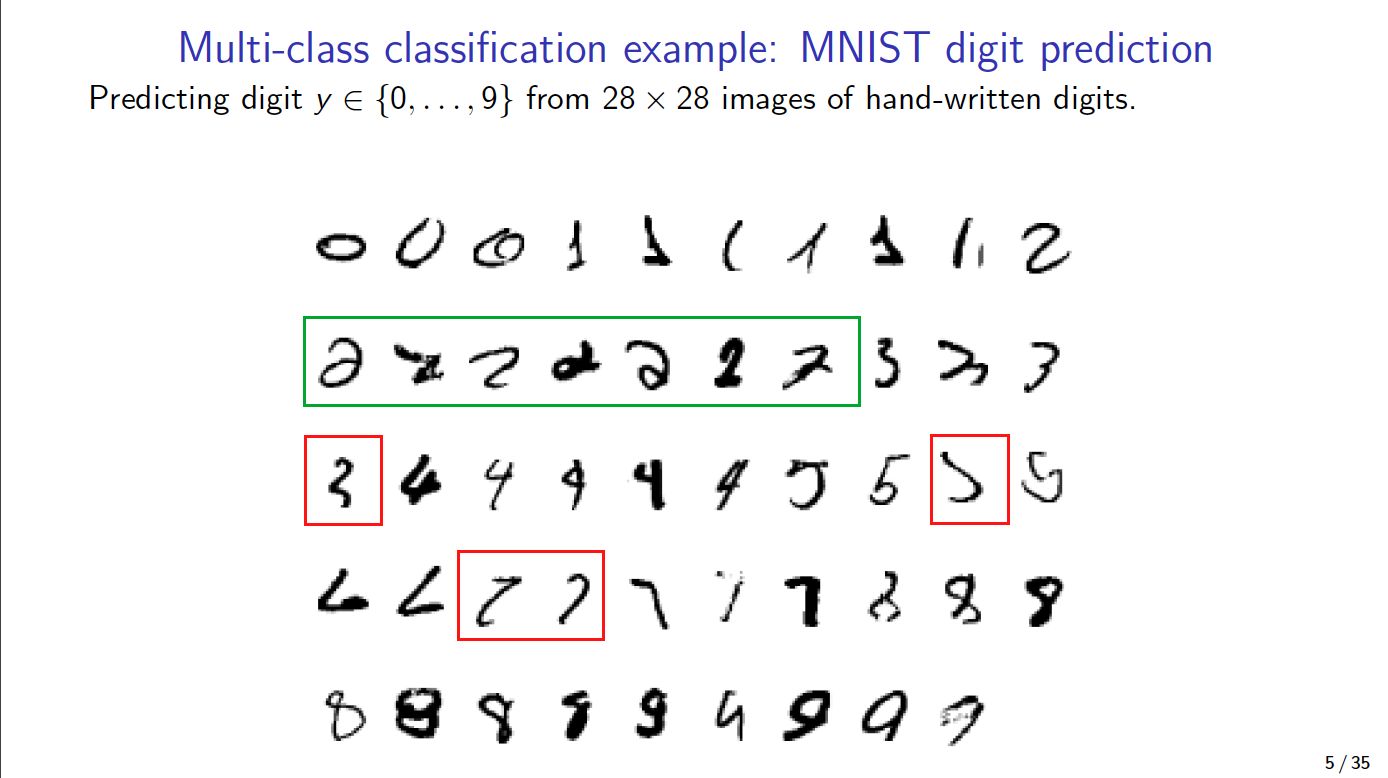

<center><h1>

Predictions for each class are based on the softmax function:

$\hat{y}_c = \frac{exp(a_c)}{\sum_{c'}exp(a_{c'})}$

</center></h1>

## **Question**: what is another dataset that is suitable for multiclass regression?

In [ ]:
import numpy as np
from sklearn import model_selection
from matplotlib import pyplot as plt
from sklearn import preprocessing
import random
random.seed(551)

## Simulate toy data

In [ ]:
## Number of samples
N = 150

## Predictor variable X
X = np.column_stack((np.random.binomial(1, 0.5, N),
                     np.random.binomial(1, 0.5, N),
                     np.random.binomial(1, 0.5, N),
                     np.random.binomial(1, 0.5, N)))

## "True" Logistic Regression weights
W_true = np.array([[0,1,0],
                   [0,0,1],
                   [1,0,0],
                   [0,0,1]])

## a = XW
a = np.matmul(X, W_true)

## Create binary label
y = np.zeros_like(a)
y[np.arange(len(a)), a.argmax(1)] = 1

In [ ]:
## Plot data matrix and weights matrix
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
matplotlib.rcParams.update({'font.size': 22})

## Data X (transposed)
fig, ax = plt.subplots(1,2, figsize=[18.,9.], sharey=True)
im_X = ax[0].imshow(X.T, aspect='auto')
ax[0].set_title('$X^T$ - data (transposed)')
ax[0].set_yticks( np.arange(X.shape[1]))
ax[0].set_xlabel('Samples')
ax[0].set_ylabel('Features')
## add colorbar
#divider = make_axes_locatable(ax[0])
#cax = divider.append_axes('right', size='5%', pad=0.05)
#plt.colorbar(im_X, cax=cax)

## Weights W
im_W = ax[1].imshow(W_true, aspect='auto')
ax[1].set_title('W - weights matrix')
ax[1].set_xticks( np.arange(W_true.shape[1]))
ax[1].set_yticks( np.arange(W_true.shape[0]))
ax[1].set_xlabel('Classes')
## add colorbar
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(im_W, cax=cax)

plt.suptitle('$\hat{y}_c \propto exp(a_c)$ \n $a = XW$')
plt.tight_layout();
plt.show()

<h1><center>

Predictions for each class are based on the softmax function:

$\hat{y}_c = \frac{exp(a_c)}{\sum_{c'}exp(a_c')}$

and weights W are updated using the following gradient

$\frac{\partial J}{\partial W} = X^T(\hat{Y}-Y)$

in order to minimize the cross-entropy loss

$J = -\sum_{c=1}^{C}y_c log(\hat{y}_c)$
</center></h1>

In [ ]:
class Multinomial_logistic:
    def __init__(self, nFeatures, nClasses):
        self.W = np.random.rand(nFeatures, nClasses)

    def predict(self, X):
        y_pred = np.exp(np.matmul(X, self.W)) # y_c ~ exp(a_c),  a = XW
        return y_pred / y_pred.sum(axis=1).reshape(X.shape[0], 1) # softmax

    def grad(self, X, y):
        return np.matmul(X.transpose(), self.predict(X) - y) # gradient of cross-entropy loss

    def ce(self, X, y):
        return -np.sum(y * np.log(self.predict(X)))  # entropy loss

    # modify it to add stopping criteria (what can you think of?)
    def fit(self, X, y, X_valid=None, y_valid=None, lr=0.005, niter=100, early_stopping=False):
        losses_train = np.zeros(niter)
        losses_valid = np.zeros(niter)

        ## for each iteration, update weights W using gradient and compute cross-entropy loss
        for i in range(niter):
            self.W = self.W - lr * self.grad(X, y)  # update weights W via gradient descent
            loss_train = self.ce(X, y)              # compute cross-entropy loss
            losses_train[i] = loss_train

            ## print cross-entropy loss on training and (optionally) validation sets
            if X_valid is not None and y_valid is not None:
                loss_valid = self.ce(X_valid, y_valid)
                losses_valid[i] = loss_valid
                #print(f"iter {i}: {loss_train:.3f}; {loss_valid:.3f}")

                if early_stopping and i>10:
                  loss_is_smaller = (loss_valid < losses_valid[i-10])
                  if not loss_is_smaller:
                    print('Early stopping at iter {} due to increase in validation loss'.format(i))
                    break

            #else:
                #print(f"iter {i}: {loss_train:.3f}")
        return losses_train, losses_valid

    ## check gradient calculation via small perturbation (optional)
    def check_grad(self, X, y):
        N, C = y.shape
        D = X.shape[1]

        diff = np.zeros((D, C))

        W = self.W.copy()  # save original value of W

        for i in range(D): # loop through D features
            for j in range(C): # loop through C classes

                epsilon = np.zeros((D, C))                # all zeros
                epsilon[i, j] = np.random.rand() * 1e-4   # all zeros, except for epsilon[i,j]

                self.W = self.W + epsilon     # alter W only at (i,j)
                J1 = self.ce(X, y)            # remember, cross-entropy depends on model prediction, which in turn depends on W (i.e. self.W)
                self.W = W                    # reassign W to original value

                self.W = self.W - epsilon     # same as above
                J2 = self.ce(X, y)
                self.W = W

                ## numerical and analytical gradient for feature i and class j specifically
                numeric_grad = (J1 - J2) / (2 * epsilon[i, j])
                derived_grad = self.grad(X, y)[i, j]

                ## verify whether numerical and analytical gradients similar enough
                diff[i, j] = np.square(derived_grad - numeric_grad).sum() / \
                             np.square(derived_grad + numeric_grad).sum()

        # print(diff)
        return diff.sum()


Split the data into training, validation, and testing

In [ ]:
## split full data into test and train sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size = 0.33, random_state=1, shuffle=True)

## further split train data into train and validation sets
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(
    X_train, y_train, test_size = 0.5, random_state=1, shuffle=True)

## display sizes
print('Size of training data - X:{} y:{}'.format(X_train.shape, y_train.shape))
print('Size of validation data - X:{} y:{}'.format(X_valid.shape, y_valid.shape))
print('Size of test data - X:{} y:{}'.format(X_test.shape, y_test.shape))

Create Multinomial Logistic Regression model object

In [ ]:
## remember, X and y toy data

D = X.shape[1]  # number of features
C = y.shape[1]  # number of classes

mlr = Multinomial_logistic(D, C)  # instantiate and initialize model

Check gradients

In [ ]:
# check grad
print(mlr.check_grad(X_train, y_train))

Fitting the multinomial logistic model

In [ ]:
## Fit
ce_train, ce_valid = mlr.fit(X_train, y_train, X_valid, y_valid, niter=1000)

In [ ]:
## plot progression of train-set and validation-set cross-entropy loss
plt.clf()
plt.plot(ce_train/X_train.shape[0], label='train')
plt.plot(ce_valid/X_valid.shape[0], label='valid')
plt.xlabel("iteration")
plt.ylabel("CE")
plt.legend()
plt.show()
#plt.savefig("training_ce.png", bbox_inches="tight", dpi=300)

From the above plot, we can see that the training and validation error curves both continue to decrease. Therefore, there is no sign of overfitting.

### Evaluate classification accuracy of fitted model

In [ ]:
def evaluate(y, y_pred):
    accuracy = sum(y_pred.argmax(axis=1) == y.argmax(axis=1))
    accuracy = accuracy / y.shape[0]
    return accuracy

In [ ]:
## training set accuracy
y_pred_train = mlr.predict(X_train)
train_accuracy = evaluate(y_pred_train, y_train)

## validation set accuracy
y_pred_valid = mlr.predict(X_valid)
valid_accuracy = evaluate(y_pred_valid, y_valid)

## testing set accuracy
y_pred_test = mlr.predict(X_test)
test_accuracy = evaluate(y_pred_test, y_test)

print(train_accuracy)
print(valid_accuracy)
print(test_accuracy)

In [ ]:
## visualize predictions
fig, ax = plt.subplots(figsize=[12,4])
plt.imshow(y_pred_train.T, aspect='auto')
plt.ylabel('classes')
plt.xlabel('samples')
plt.colorbar()
plt.tight_layout()
plt.show()

In [ ]:
## maximal probability for each sample
pred_train_max = y_pred_train.max(1)[:,None]
#print(pred_train_max, '\n')

## which class is associated with maximal probability
is_pred_train_max = (y_pred_train == pred_train_max)
#print(is_pred_train_max)

## visualize predictions
fig, ax = plt.subplots(2,1,figsize=[14,6], sharex='all')
im = ax[0].imshow(y_pred_train.T, aspect='auto')
ax[0].set_ylabel('classes')

ax[1].imshow(is_pred_train_max.T, aspect='auto')
ax[1].set_ylabel('classes')
ax[1].set_xlabel('samples')
cbar = fig.colorbar(im, ax=ax.ravel().tolist(), shrink=0.95)
#ax[1].colorbar()
fig.show()

### Visualize weights matrix W

In [ ]:
from seaborn import heatmap
W_hat = mlr.W
hmp = heatmap(W_hat, cmap='RdBu_r', center=0)
fig = hmp.get_figure()
plt.xlabel('classes')
plt.ylabel('features')
fig.show()
#fig.savefig("W_hat.png")

Plot W as softmax

In [ ]:
W_hat_transformed = np.exp(W_hat)
W_hat_transformed = W_hat_transformed / W_hat_transformed.sum(axis=0)[None,:] # for interpretability, normalize over features (not classes)
W_hat_transformed

Now plot the softmax-transformed heatmap, which looks almost identical to groundtruth.

In [ ]:
fig, ax = plt.subplots(1,2,figsize=[13.,6.])

ax[0].set_title('model parameter weights')
hmp1 = heatmap(W_hat_transformed, cmap='gray_r', ax=ax[0], cbar=True)
fig1 = hmp1.get_figure()

ax[1].set_title('ground truth')
hmp2 = heatmap(W_true, cmap='gray_r', ax=ax[1])
fig2 = hmp2.get_figure()

ax[0].set_xlabel('classes'); ax[1].set_xlabel('classes')
ax[0].set_ylabel('features')
fig.tight_layout(); fig.show()
#fig.savefig("W_hat_transformed.png")

## Iris flower classification

In [ ]:
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()

feature_names = iris['feature_names'].copy()
label_names = iris['target_names'].tolist()

print(feature_names) # print flower types
print(label_names) # print flower feature names

X = iris.data
y_cat = iris.target

# convert array of class indices to one-hot encoded array
y = np.zeros((y_cat.size, y_cat.max() + 1))
y[np.arange(y_cat.size), y_cat] = 1

## visualize data labels y
plt.figure(figsize=[18.,3.])
plt.imshow(y.T, aspect='auto')
plt.xlabel('samples')
plt.ylabel('flower types')
plt.yticks(np.arange(3), labels=iris['target_names'])
plt.title('Data labels y')
plt.show()

Once again, we split the data into training, testing, and validation

In [ ]:
## create training, validation and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size = 0.66, random_state=1, shuffle=True)

X_train, X_valid, y_train, y_valid = model_selection.train_test_split(
    X_train, y_train, test_size = 0.5, random_state=1, shuffle=True)

## extract number of training samples (N) and number of classes (C)
N, C = y_train.shape

## process training set
X_train = preprocessing.scale(X_train) # standardize input data
X_train = np.c_[X_train, np.ones(N)] # add one column to learn the linear intercept

## process validation set
X_valid = preprocessing.scale(X_valid)
X_valid = np.c_[X_valid, np.ones(X_valid.shape[0])]

## process testing set
X_test = preprocessing.scale(X_test)
X_test = np.c_[X_test, np.ones(X_test.shape[0])]

D = X_train.shape[1]

In [ ]:
## instantiate and initialize model
mlr = Multinomial_logistic(D, C)

# check grad
print(mlr.check_grad(X_train, y_train))

## fit model
ce_train, ce_valid = mlr.fit(X_train, y_train, X_valid, y_valid, lr=0.005, niter=1000, early_stopping=True)

In [ ]:
## plot evolution of cross-entropy
plt.plot(ce_train, label='train')
plt.plot(ce_valid, label='valid')
plt.legend()
plt.xlabel("Iter")
plt.ylabel("CE")
plt.show()
#plt.savefig("iris_training_ce.png", bbox_inches="tight", dpi=300)

In [ ]:
## instantiate and initialize model
mlr = Multinomial_logistic(D, C)

## retrain model for only number iterations associated with smallest cross-entropy on validation set
optimal_niter = ce_valid.argmin()

print(f'Retrain model up to early-stopping epoch {optimal_niter-1}')
_, _ = mlr.fit(X_train, y_train, niter=optimal_niter) # retrain the model using best niter

Check classification accuracy on training, validation, and testing sets

In [ ]:
train_accuracy = evaluate(mlr.predict(X_train), y_train)
valid_accuracy = evaluate(mlr.predict(X_valid), y_valid)
test_accuracy = evaluate(mlr.predict(X_test), y_test)

print(f'Train accuracy: {train_accuracy:.2f}')
print(f'Validation accuracy: {valid_accuracy:.2f}')
print(f'Test accuracy: {test_accuracy:.2f}')

Visualize feature weights for each flower class

In [ ]:
W_hat = mlr.W[:-1,:] # remove the intercept
W_hat_transformed = np.exp(W_hat)
W_hat_transformed = W_hat_transformed / W_hat_transformed.sum(axis=0)[None,:] # softmax normalize weights across features for interpretability

W_hat_transformed_df = pd.DataFrame(W_hat_transformed, columns=label_names, index=feature_names) # save as pandas DataFrame to make visualization easier
hmp = heatmap(W_hat_transformed_df, cmap='gray_r')
fig = hmp.get_figure()
fig.savefig("iris_W_hat_transformed.png", bbox_inches="tight", dpi=300)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/yueliyl/comp551-notebooks/blob/master/Regularization.ipynb)


# Regularization

We've previously seen that linear regression can perform well on simple datasets where a linear relation exists between variables $x$ and $y$. Moreover, for more complex relations, we can use nonlinear bases to account for the increased complexity. However, one runs into the risk of modelling too much complexity, generally understood as fitting noise within the data. This phenomenon of over-complex fitting is termed *over-fitting*.

Regularization serves to tackle the problem of over-fitting by penalizing the complexity of a model's fit to data.

In [ ]:
import numpy as np
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')
import itertools
from copy import deepcopy

import random
np.random.seed(1234)

## Linear regression and non-linear basis functions

In [ ]:
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])    #add bias by adding a constant feature of value 1
        #alternatively: self.w = np.linalg.inv(x.T @ x)@x.T@y
        self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference
        return self

    def predict(self, x):
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w                             #predict the y values
        return yh


## Nonlinear basis functions
Consider the toy dataset below. It is obvious that our attempt to model $y$ as a linear function of $x$ would produce a bad fit.
Let's try!

In [ ]:
N = 100
x = np.linspace(0,10, N)
yt = np.sin(x) + np.cos(x**.5)                      # non-linear transformation
y = yt + .5*np.random.randn(N)                      # generate y using a non linear model and add noise
model = LinearRegression()
yh = model.fit(x,y).predict(x)
plt.plot(x, y, '.')
plt.plot(x, yt, 'b-', label='correct model')
plt.plot(x, yh, 'g-', alpha=.5, label='linear fit')

sse = np.square(yh - y).sum()
plt.title(f'curve-fitting using linear function (SSE = {sse:.2f})')

plt.xlabel('x')
plt.ylabel(r'y')
plt.legend()
# plt.show()
plt.savefig('sin.png', bbox_inches="tight", dpi=300)

In [ ]:
def plot_contour(f, x1bound, x2bound, resolution, ax):
    x1range = np.linspace(x1bound[0], x1bound[1], resolution)
    x2range = np.linspace(x2bound[0], x2bound[1], resolution)
    xg, yg = np.meshgrid(x1range, x2range)
    zg = np.zeros_like(xg)
    for i,j in itertools.product(range(resolution), range(resolution)):
        zg[i,j] = f([xg[i,j], yg[i,j]])
    ax.contour(xg, yg, zg, 100)
    return ax

In [ ]:
x_tended = np.linspace(-3,13,1000)

D=3
gaussian = lambda x,mu,sigma: np.exp(-((x-mu)/sigma)**2)          #non-linear feature function
mu = np.linspace(0,10,D)                                          #different mean values for the non-linear features
phi = gaussian(x_tended[:,None], mu[None,:],1)                           #gives a new set of features of the existing data

for d in range(D):
    plt.plot(x_tended, phi[:,d], '-')

plt.xlabel('x')
plt.title('Gaussian bases')
plt.xticks(mu)
plt.show()
#plt.savefig('gaussian_basis.png', bbox_inches="tight", dpi=300)

In [ ]:
D=3
gaussian = lambda x,mu,sigma: np.exp(-((x-mu)/sigma)**2)          #non-linear feature function
mu = np.linspace(0,10,D)                                          #different mean values for the non-linear features
phi = gaussian(x[:,None], mu[None,:],1)                           #gives a new set of features of the existing data

for d in range(D):
    plt.plot(x, phi[:,d], '-')
plt.xlabel('x')
plt.title('Gaussian bases - range of data $x$')
plt.xticks(mu)
plt.show()
#plt.savefig('gaussian_basis.png', bbox_inches="tight", dpi=300)

Now we predict `y` using `phi` as input features rather than `x`:

In [ ]:
model = LinearRegression()
yh = model.fit(phi,y).predict(phi)

fig, ax = plt.subplots(1,2,figsize=[16.,5.], sharex=True, sharey=True)

for d in range(D):
    ax[0].plot(x, model.w[d]*phi[:,d], '-', alpha=.5, label='mu={}'.format(int(mu[d])))

ax[1].plot(x, y, '.')
ax[1].plot(x, yt, 'b-', label='ground truth')
ax[1].plot(x, yh, 'g-', label='our fit')

ax[0].legend(); ax[1].legend()
sse = np.square(yh - y).sum()
fig.suptitle(f'curve-fitting using {D} Gaussian bases SSE = {sse:.2f}')
fig.show()
#plt.savefig(f'{D}_gaussian_bases_fit.png', bbox_inches="tight", dpi=300)

Let's try increase the bases function to 5, 10, 50, and 200.

In [ ]:
weight_list = []

fig, ax = plt.subplots(1,4,figsize=(16, 3), sharex=True, sharey=True)
for d, D in enumerate([5,10,50,200]):

    mu = np.linspace(0,10,D)                                          #different mean values for the non-linear features
    phi = gaussian(x[:,None], mu[None,:],1)                           #gives a new set of features of the existing data

    yh = model.fit(phi,y).predict(phi)

    weight_list.append(model.w) # store the model weights

    ax[d].plot(x, y, '.')
    ax[d].plot(x, yt, 'b-', label='ground truth')
    ax[d].plot(x, yh, 'g-', label='our fit')
    ax[d].legend()

    sse = np.square(yh - y).sum()
    ax[d].set_title(f'{D} Gaussian bases (SSE = {sse:.2f})')

plt.show()
#plt.savefig(f'{D}_gaussian_bases_fit.png', bbox_inches="tight", dpi=300)

Plot learned weights of linear regression models based on different number of Gaussian bases

In [ ]:
_, axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True, figsize=(8, 4.5), sharey=False)

axes[0,0].bar([i for i in range(len(weight_list[0]))], weight_list[0].tolist()); axes[0,0].set_title('D = 5')
axes[0,0].set_xticklabels(labels=['w'+str(d) for d in range(len(weight_list[0]))] + list(['bias']))

axes[0,1].bar([i for i in range(len(weight_list[1]))], weight_list[1].tolist()); axes[0,1].set_title('D = 10')
axes[0,1].set_xticklabels(labels=['w'+str((2*d)-1) for d in range(len(weight_list[1])//2+1)] + list(['bias']))

axes[1,0].bar([i for i in range(len(weight_list[2]))], weight_list[2].tolist()); axes[1,0].set_title('D = 50')
axes[1,1].bar([i for i in range(len(weight_list[3]))], weight_list[3].tolist()); axes[1,1].set_title('D = 200')

plt.suptitle('Weights for linear regression model')
plt.savefig('gaussian_bases_weights.png', bbox_inches="tight", dpi=300)

## Ridge regression
From the plots above, we observe that more complex models that use more nonlinear bases will tend to learn weights that diverge towards very large values. We can penalize large weights with *ridge regression*, a regularized variant of linear regression.

Let's create a toy data:

In [ ]:
N = 20
x = np.random.rand(N) * 10
y = -4*x + 10 + 2*np.random.randn(N)

Visualize the regularized **cost function**

In [ ]:
cost = lambda w: .5*np.mean((w[0] + w[1]*x - y)**2)
l2_penalty = lambda w: np.dot(w,w)/2
l1_penalty = lambda w: np.sum(np.abs(w))
cost_plus_l2 = lambda w: cost(w) + 5*l2_penalty(w)

fig, axes = plt.subplots(ncols=4, nrows=1, constrained_layout=True, figsize=(16, 4))

plot_contour(cost, [-20,20], [-20,20], 50, axes[0])
axes[0].set_title(r'cost function $J(w)$')
axes[0].set_xlabel('bias ($w_0$)'); axes[0].set_ylabel('slope ($w_1$)')

plot_contour(l2_penalty, [-20,20], [-20,20], 50, axes[-1])
axes[-1].set_title(r'L2 reg. $||w||_2^2$')
axes[-1].set_xlabel('bias ($w_0$)'); axes[-1].set_ylabel('slope ($w_1$)')

fig.delaxes(axes[1])
fig.delaxes(axes[2])

plt.tight_layout()
#plt.savefig('l2_contour_plots.png', bbox_inches="tight", dpi=300)
plt.show()

from time import sleep
sleep(5)

## create interpolation
lambdas = np.logspace(-1,2,4)
_, axes = plt.subplots(ncols=len(lambdas), nrows=1, constrained_layout=True, figsize=(16, 4))
for li,l in enumerate(lambdas):
  cost_plus_l2 = lambda w: cost(w) + l*l2_penalty(w)
  plot_contour(cost_plus_l2, [-20,20], [-20,20], 50, axes[li])
  axes[li].set_title(r'$J(w) + {:.1f} ||w||_2^2$'.format(l))
plt.show()

Let's use the `GradientDescent` and `LinearRegression` classes from the previous lecture. The only update we have made is in using `l2_reg` which sets the regularization coefficient $\lambda$ for L2 regularization. This information is used when calculating the gradient to perform weight decay. Note that a good practice is to *avoid penalizing the bias* $w_0$. Here, for the sake of visualization we penalize the bias as well.

In [ ]:
class GradientDescent:

    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8, record_history=False):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.w_history = []

    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t = 1
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            grad = gradient_fn(x, y, w)
            w = w - self.learning_rate * grad
            if self.record_history:
                self.w_history.append(w)
            t += 1
        return w

class RidgeRegression:
    def __init__(self, add_bias=True, l2_reg=0):
        self.add_bias = add_bias
        self.l2_reg = l2_reg
        pass

    def fit(self, x, y, optimizer):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        def gradient(x, y, w):
            yh =  x @ w
            N, D = x.shape
            grad = .5*np.dot(yh - y, x)/N
            grad += self.l2_reg* w
            return grad
        w0 = np.array([3,-10]) # weights initialization
        self.w = optimizer.run(gradient, x, y, w0)
        return self

    def fit_closedform(self, x, y):
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features

        N = x.shape[0]

        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])    #add bias by adding a constant feature of value 1

        D = x.shape[1]
        if self.l2_reg==0:
            self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference
        else:
            self.w = np.linalg.inv(x.T @ x + self.l2_reg * np.identity(D)) @ x.T @ y

        return self

    def predict(self, x):
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w
        return yh

Now let's visualize the landscape of regularized cost function for different amounts of regularization and see the effect of regularization on gradient descent.

In [ ]:
cost = lambda w, reg: .5*np.mean((w[0] + w[1]*x - y)**2) + reg*np.dot(w,w)/2
reg_list = [0, 1, 10]

## loop through different L2 regularization values
fig, axes = plt.subplots(ncols=len(reg_list), nrows=1, constrained_layout=True, figsize=(15, 5))
for i, reg_coef in enumerate(reg_list):
    ## instantiate and fit model
    optimizer = GradientDescent(learning_rate=.01, max_iters=1000, record_history=True)
    model = RidgeRegression(optimizer, l2_reg=reg_coef)
    model.fit(x,y, optimizer)

    ## update position within loss landscape
    current_cost = lambda w: cost(w, reg_coef)
    plot_contour(current_cost, [-20,20], [-5,5], 50, axes[i])
    w_hist = np.vstack(optimizer.w_history)# T x 2

    ## plot
    axes[i].plot(w_hist[:,1], w_hist[:,0], '.r', alpha=.8)
    axes[i].plot(w_hist[:,1], w_hist[:,0], '-r', alpha=.3)
    axes[i].set_xlabel(r'$w_0$')
    axes[i].set_ylabel(r'$w_1$')
    axes[i].set_title(r'$\lambda_{L2}$ = ' + str(reg_coef))
    axes[i].set_xlim([-20,20])
    axes[i].set_ylim([-5,5])
plt.show()

The plots show that L2 regularization helps with the convergence of gradient descent.

## Fitting Gaussian bases using ridge regression

In [ ]:
N = 100
x = np.linspace(0,10, N)
yt = np.sin(x) + np.cos(x**.5)
y = yt + .5*np.random.randn(N)                      #generate y using a non linear model and add noise

weight_list = []

optimizer = GradientDescent(learning_rate=.01, max_iters=50, record_history=False)

_, axes = plt.subplots(ncols=4, nrows=2, constrained_layout=True, figsize=(18, 5))
for d, D in enumerate([5, 10, 50, 200]):

    model = RidgeRegression(l2_reg=0.1)
    mu = np.linspace(0,10,D)                                          #different mean values for the non-linear features
    phi = gaussian(x[:,None], mu[None,:],1)                           #gives a new set of features of the existing data

    yh = model.fit_closedform(phi,y).predict(phi)

    weight_list.append(model.w) # store the model weights

    axes[0,d].plot(x, y, '.')
    axes[0,d].plot(x, yt, 'b-', label='ground truth')
    axes[0,d].plot(x, yh, 'g-', label='our fit')
    axes[0,d].legend()
    axes[0,d].set(xlabel='input $x$', ylabel='output $y$')

    sse = np.square(yh - y).sum()
    plt.savefig(f'{D}_gaussian_bases_ridge.png', bbox_inches="tight", dpi=300)

    axes[1,d].bar([i for i in range(len(model.w))], model.w.tolist()); axes[0,d].set_title('$D$ = {} (SSE = {:.2f})'.format(D,sse))
    axes[1,d].set(xlabel='Gaussian bases (and intercept)')

axes[1,0].set_ylabel('weight')
plt.suptitle('Ridge regression $\lambda=0.1$ with different number of Gaussian bases $D$')
plt.show()
#plt.savefig('gaussian_bases_weights_ridge.png', bbox_inches="tight", dpi=300)

In [ ]:
N = 100
x = np.linspace(0,10, N)
yt = np.sin(x) + np.cos(x**.5)
y = yt + .5*np.random.randn(N)                      #generate y using a non linear model and add noise

D = 200
mu = np.linspace(0,10,D)                                          #different mean values for the non-linear features
phi = gaussian(x[:,None], mu[None,:],1)

weight_list = []

optimizer = GradientDescent(learning_rate=.01, max_iters=50, record_history=False)

_, axes = plt.subplots(ncols=4, nrows=2, constrained_layout=True, figsize=(18, 5))
for l, l2 in enumerate([0, 0.1, 1, 10]):

    model = RidgeRegression(l2_reg=l2)                          #gives a new set of features of the existing data

    yh = model.fit_closedform(phi,y).predict(phi)

    weight_list.append(model.w) # store the model weights

    axes[0,l].plot(x, y, '.')
    axes[0,l].plot(x, yt, 'b-', label='ground truth')
    axes[0,l].plot(x, yh, 'g-', label='our fit')
    axes[0,l].legend()
    axes[0,l].set(xlabel='input $x$', ylabel='output $y$')

    sse = np.square(yh - y).sum()

    axes[1,l].bar([i for i in range(len(model.w))], model.w.tolist()); axes[0,l].set_title('$\lambda$ = {} (SSE = {:.2f})'.format(l2,sse))
    axes[1,l].set(xlabel='Gaussian bases (and intercept)')

axes[1,0].set_ylabel('weight')
plt.suptitle('Ridge regression $D={}$ with different regularization values $\lambda$'.format(D))

## LASSO regression
From the plots above, we observe that Ridge regression (or L2 regularization) adequatly regulizes linear regression with nonlinear Gaussian bases. Ridge regression achieves this regularization by penalizing the *squared* weight values. We notice however that nearly all 200 bases are used to model a relatively simple relation between $x$ and $y$.

Another approach to regularizing linear regression is via LASSO regression, or L1 regularization. Instead of penalizing the squared weights, LASSO penalizes the size of the weights directly (i.e. does compute the square of weights). We will now explore LASSO regression:

In [ ]:
class LassoRegression:
    def __init__(self, add_bias=True, spare_bias=True, l1_reg=0):
        self.add_bias = add_bias
        self.spare_bias = spare_bias
        self.l1_reg = l1_reg
        pass

    def soft_thresh(self, x, y, d):
        ## copy weights and set w_d to 0
        self.w_no_d = self.w.copy()
        self.w_no_d[d] = 0

        ## compute quantities needed for soft-thresholding
        x_no_d = x.copy()
        x_no_d[:,d] = 0
        yh_no_d = x_no_d@self.w_no_d
        x_d  = x[:,d]
        soft_thresh_arg = x_d.T @ (y - yh_no_d)
        sign = np.sign(soft_thresh_arg)

        ## spare bias/intercept parameter from L1 regularization
        if (self.add_bias and self.spare_bias and d==x.shape[1]):
            l1_reg = 0
        else:
            l1_reg = deepcopy(self.l1_reg)

        ## perform soft-thresholding
        soft_thresh_out = np.max( np.abs(soft_thresh_arg) - l1_reg , 0 )
        soft_thresh_out = sign * soft_thresh_out
        return soft_thresh_out, x_d

    def lasso_loss(self, x, y):
        regression_loss = 0.5 * (y - x@self.w).T @ (y - x@self.w) # standard regression loss
        l1_loss = self.l1_reg * np.abs(self.w).sum()              # contribution of L1 loss
        return regression_loss + l1_loss                          # full L1 loss

    def fit(self, x, y, max_iter=int(1e5), eps=1e-6, track_history=False):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])

        N,D = x.shape
        self.w = np.zeros(D)
        self.loss = self.lasso_loss(x, y)

        if track_history:
          self.w_history = [self.w.copy()]

        for i in range(max_iter):
          w_i = np.zeros(D)
          for d in range(D):
              soft_thresh_out, x_d = self.soft_thresh(x, y, d)  # soft-thresholding
              self.w[d] = soft_thresh_out / np.sum(x_d**2)      # re-adjust w_d

          if track_history:
            self.w_history.append(self.w.copy())

          ## verify whether loss is stabilized
          loss = self.lasso_loss(x, y)
          if np.abs(loss - self.loss) < eps:
              print('Training loss stabilized at iteration {}'.format(i))
              break
          else:
              self.loss = deepcopy(loss)

        if i == (max_iter-1):
          print('Training stopped at maximum iterations of {}'.format(max_iter))
        return self

    def predict(self, x):
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w
        return yh

Fit LASSO regression model with different regularization parameter values $\lambda_{L1}$

In [ ]:
N = 100
x = np.linspace(0,10, N)
yt = np.sin(x) + np.cos(x**.5)
y = yt + .5*np.random.randn(N)                      #generate y using a non linear model and add noise

D = 10
mu = np.linspace(0,10,D)                                          #different mean values for the non-linear features
phi = gaussian(x[:,None], mu[None,:],1)

weight_list = []

_, axes = plt.subplots(ncols=4, nrows=2, constrained_layout=True, figsize=(16, 5))
for l, l1 in enumerate([0, 0.1, 1, 10]):

    model = LassoRegression(l1_reg=l1)
    mu = np.linspace(0,10,D)                                          #different mean values for the non-linear features
    phi = gaussian(x[:,None], mu[None,:],1)                            #gives a new set of features of the existing data

    yh = model.fit(phi, y, max_iter=int(1e4), eps=1e-4).predict(phi)

    weight_list.append(model.w) # store the model weights

    axes[0,l].plot(x, y, '.')
    axes[0,l].plot(x, yt, 'b-', label='ground truth')
    axes[0,l].plot(x, yh, 'g-', label='our fit')
    axes[0,l].legend()
    axes[0,l].set(xlabel='input $x$', ylabel='output $y$')

    sse = np.square(yh - y).sum()

    axes[1,l].bar([i for i in range(len(model.w))], model.w.tolist()); axes[0,l].set_title('$\lambda$ = {} (SSE = {:.2f})'.format(l1,sse))
    axes[1,l].set(xlabel='Gaussian bases (and intercept)')

axes[1,0].set_ylabel('weight')
plt.suptitle('LASSO regression $D={}$ with different regularization values $\lambda$'.format(D))
plt.show()

Fit LASSO regression model with number of Gaussian bases $D$ and fixed $\lambda_{L1}=0.1$

In [ ]:
N = 100
x = np.linspace(0,10, N)
yt = np.sin(x) + np.cos(x**.5)
y = yt + .5*np.random.randn(N)                      #generate y using a non linear model and add noise

weight_list = []

_, axes = plt.subplots(ncols=4, nrows=2, constrained_layout=True, figsize=(18, 5))
for d, D in enumerate([5, 10, 50, 200]):

    model = LassoRegression(l1_reg=0.1)
    mu = np.linspace(0,10,D)                                          #different mean values for the non-linear features
    phi = gaussian(x[:,None], mu[None,:],1)                           #gives a new set of features of the existing data

    yh = model.fit(phi, y, max_iter=int(1e3), eps=1e-4).predict(phi)

    weight_list.append(model.w) # store the model weights

    axes[0,d].plot(x, y, '.')
    axes[0,d].plot(x, yt, 'b-', label='ground truth')
    axes[0,d].plot(x, yh, 'g-', label='our fit')
    axes[0,d].legend()
    axes[0,d].set(xlabel='input $x$', ylabel='output $y$')

    sse = np.square(yh - y).sum()

    axes[1,d].bar([i for i in range(len(model.w))], model.w.tolist()); axes[0,d].set_title('$D$ = {} (SSE = {:.2f})'.format(D,sse))
    axes[1,d].set(xlabel='Gaussian bases (and intercept)')

axes[1,0].set_ylabel('weight')
plt.suptitle('LASSO regression $\lambda=0.1$ with different number of Gaussian bases $D$')
plt.show()

In [ ]:
N = 100
x = np.random.rand(N) * 10
y = -4*x + 10 + 2*np.random.randn(N)

cost = lambda w, reg: .5*np.mean((w[0] + w[1]*x - y)**2) + reg*np.abs(w).sum()
reg_list = [0, 10, 50]

## loop through different L2 regularization values
fig, axes = plt.subplots(ncols=len(reg_list), nrows=1, constrained_layout=True, figsize=(15, 5))
for i, reg_coef in enumerate(reg_list):
    ## instantiate and fit model
    model = LassoRegression(l1_reg=reg_coef, spare_bias=False)
    model.fit(x, y, max_iter=int(1e3), eps=0, track_history=True)

    ## update position within loss landscape
    current_cost = lambda w: cost(w, reg_coef)
    plot_contour(current_cost, [-20,20], [-5,5], 50, axes[i])
    w_hist = np.vstack(model.w_history)# T x 2

    ## plot
    ## comment out two commands below since not obtaining expected behaviour of loss trajectory
    #axes[i].plot(w_hist[:,1], w_hist[:,0], '.r', alpha=.8)
    #axes[i].plot(w_hist[:,1], w_hist[:,0], '-r', alpha=.3)
    axes[i].set_xlabel(r'$w_0$')
    axes[i].set_ylabel(r'$w_1$')
    axes[i].set_title(r'$\lambda_{L1}$ = ' + str(reg_coef))
    axes[i].set_xlim([-20,20])
    axes[i].set_ylim([-5,5])
plt.show()